In [1]:
#from IPython.display import display, HTML
#display(filename='http://google.com/')

In [158]:
###########################
### 1. PYTHON LIBRARIES ###
###########################
import json
from nested_lookup import nested_lookup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict,Counter
#from tabulate import tabulate
from itertools import islice
from pivottablejs import pivot_ui
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import qgrid

#############################################
### 2. HIER WIRD DIE DATENBANK EINGELESEN!###
#############################################
with open('PROM_objects.cite') as json_file:  
    database = json.load(json_file)

###########################################
### 3. HIER WERDEN FUNKTIONEN DEFINIERT ###
###########################################
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
def PlotDistribution(var1):
    l=Counter(var1)
    print(type(l))
    l=list(l.items())
    d = {"object":[item[0] for item in l] , 'number': [item[1] for item in l]};
    pd.set_option('max_colwidth',240)
    df = pd.DataFrame(data=d)
    df.set_index("object",drop=True,inplace=True)
    return df.plot(kind='bar', figsize=(22, 9), fontsize=18)      

In [127]:
#list(database.keys())

In [159]:
kl=list(database.keys())
for element in kl:
    
    if float(element)<9999:
        for k in database['1'].keys():
        #if float(element)<10:#9999:
            if k not in database[element]:
                database[element][k]='Not defined'
            if database[element][k] == '':
                database[element][k]='Not defined'
            
        string=database[element]['object_height']
           
        try:
            database[element]['object_height']=float(string.replace(',','.'))
        except:
            database[element]['object_height']=0.0
        string=database[element]['object_lenght']
        try:
            database[element]['object_lenght']=float(string.replace(',','.'))
        except:
            database[element]['object_lenght']=0.0
        string=database[element]['object_width']
        try:
            database[element]['object_width']=float(string.replace(',','.'))
        except:
            database[element]['object_width']=0.0
            
    if float(element)>=10000 and float(element)<20000:
        for k in database['10001'].keys():
            if k not in database[element]:
                database[element][k]='Not defined'
            if database[element][k] == '':
                database[element][k]='Not defined'
    if float(element)>=20000:
        for k in database['20005'].keys():
            if k not in database[element]:
                database[element][k]='Not defined'
            if database[element][k] == '':
                database[element][k]='Not defined'
        if database[element]['field4']=='m':
            database[element]['field4']='male'
        if database[element]['field2']=='adiministration':
            database[element]['field2']='administration'

In [160]:
monument=list()
persons=list()
title=list()

kl=list(database.keys())
for element in kl:
    if float(element)<9999:
        monument.append(database[element])
    if float(element)>=10000 and float(element)<20000:
        persons.append(database[element])
    if float(element)>=20000:
        title.append(database[element])

In [189]:
#################################
### 4. LISTEN WERDEN ERSTELLT ###
#################################
reduceddb=monument

holder = nested_lookup("holder", reduceddb)
object_type = nested_lookup("object_type", reduceddb)
creator = nested_lookup("creator", reduceddb)
object_lenght= nested_lookup("object_lenght", reduceddb)
object_height= nested_lookup("object_height", reduceddb)
object_width= nested_lookup("object_width", reduceddb)
dating=nested_lookup("dating", reduceddb)
kingdom=nested_lookup("kingdom", reduceddb)
period=nested_lookup("period", reduceddb)
object_id=nested_lookup("obj_id", reduceddb)
#object_height

<class 'collections.Counter'>


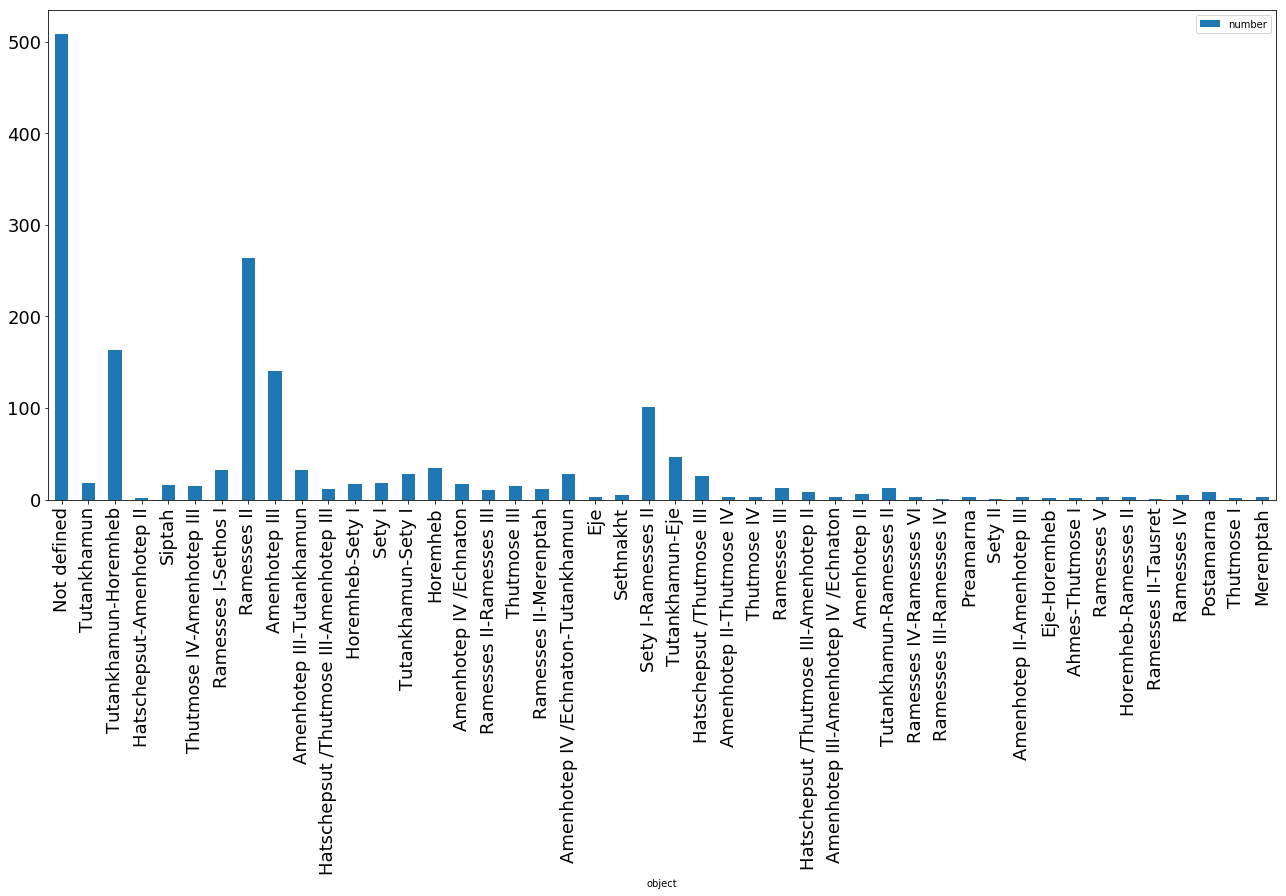

In [6]:
###########################################################################
### 5. ERSTELLE PLOT MIT FUNKTION PlotDistribution(definiert oben in 3.)###
###########################################################################
PlotDistribution(kingdom)

<class 'collections.Counter'>


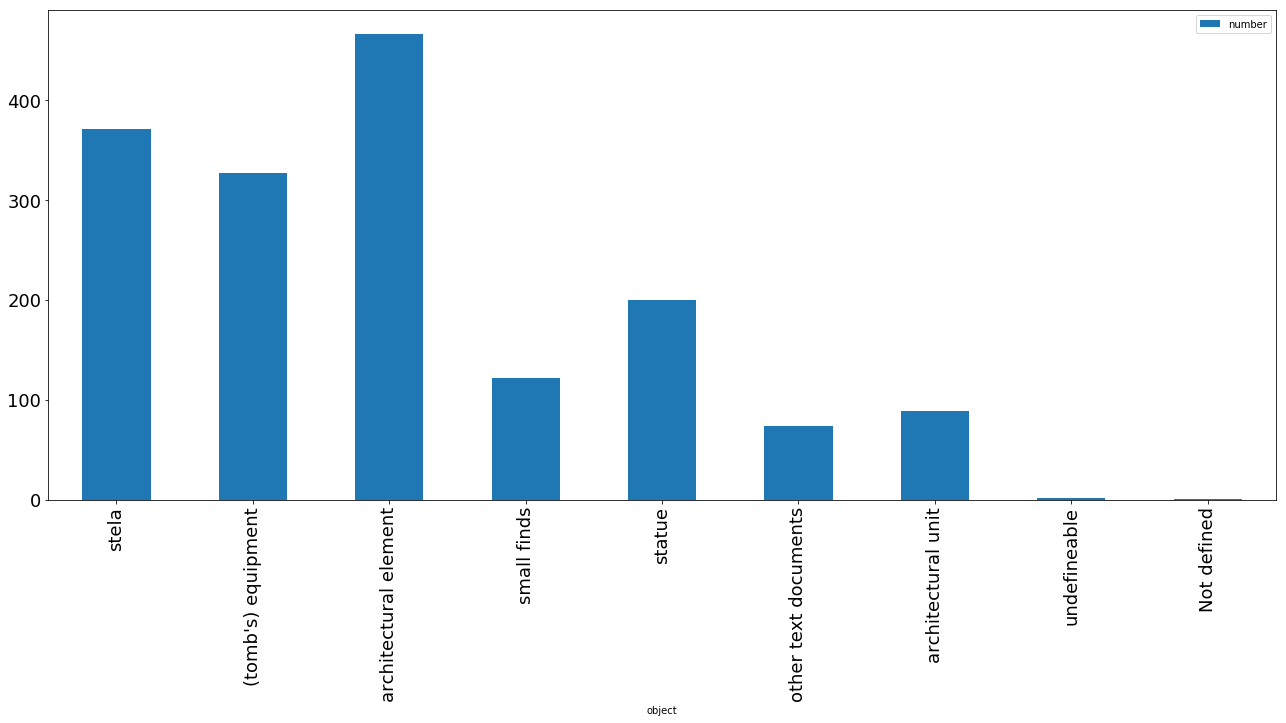

In [7]:
PlotDistribution(object_type)

In [191]:
d = {'obj_id': object_id, 'holder': holder, 'dating': dating, 'period': period, 
     'kingdom': kingdom, "object type": object_type, "object lenght": object_lenght, 
     "object height": object_height, "object width": object_width}
dfpivot0 = pd.DataFrame(data=d)
dfpivot0

,obj_id,holder,dating,period,kingdom,object type,object lenght,object height,object width
0,1,"EG, Saqqara, Main Magazine","NK, Dyn 18",1539-1292 BC,Not defined,stela,0.0,0.0,0.0
1,2,"TU, Istanbul, Ancient Orient Museum","NK, Dyn 18",1334-1324 BC,Tutankhamun,stela,0.0,70.0,51.0
2,3,"DE, Private Collection","NK, Dyn 19",1292-1191 BC,Not defined,(tomb's) equipment,19.0,0.0,0.0
3,4,"CH, Genève, Private Collection","NK, Dyn 18",1334-1292 BC,Tutankhamun-Horemheb,architectural element,41.0,0.0,75.0
4,5,"USA, New York, Brooklyn Museum","NK, Dyn 18",1479-1400 BC,Hatschepsut-Amenhotep II,small finds,7.5,18.4,29.0
5,7,Not defined,"NK, Dyn 18",1334-1292 BC,Tutankhamun-Horemheb,stela,28.0,0.0,27.0
6,8,Not defined,"NK, Dyn 19-20",1292-1077 BC,Not defined,statue,26.0,60.0,38.0
7,9,"FR, Paris, Musée du Louvre","NK, Dyn 20",1197-1193 BC,Siptah,statue,69.5,37.5,26.5
8,10,"FR, Paris, Musée du Louvre","NK, Dyn 18",1400-1353 BC,Thutmose IV-Amenhotep III,statue,31.5,46.2,29.0
9,11,"NL, Leiden Rijksmuseum van Oudheden","NK, Dyn 19",1292-1279 BC,Ramesses I-Sethos I,(tomb's) equipment,4.9,25.5,8.4


### Korrelationen

- ziehe die Reiter (holder, dating, period,...., object_height) in die leeren Felder 

In [9]:
pivot_ui(dfpivot)

In [10]:
king=list(set(kingdom))
peri=sorted(list(set(period)))

In [11]:
finallist=list()
#for j in range(len(king)):
for j in range(len(peri)):
    temp=list()
    for k in range(len(reduceddb)):
        try:
            #if reduceddb[k]['kingdom'] == king[j]:
            if reduceddb[k]['period'] == peri[j]:
                temp.append(reduceddb[k]['related_persons_list'])
        except:
            pass
    gend=nested_lookup("gender",temp)
    trans=nested_lookup("translit",temp)
    #finallist.append((king[j], Counter(gend)['m'], Counter(gend)['f'], Counter(trans)))
    finallist.append((peri[j], Counter(gend)['m'], Counter(gend)['f'], Counter(trans)))

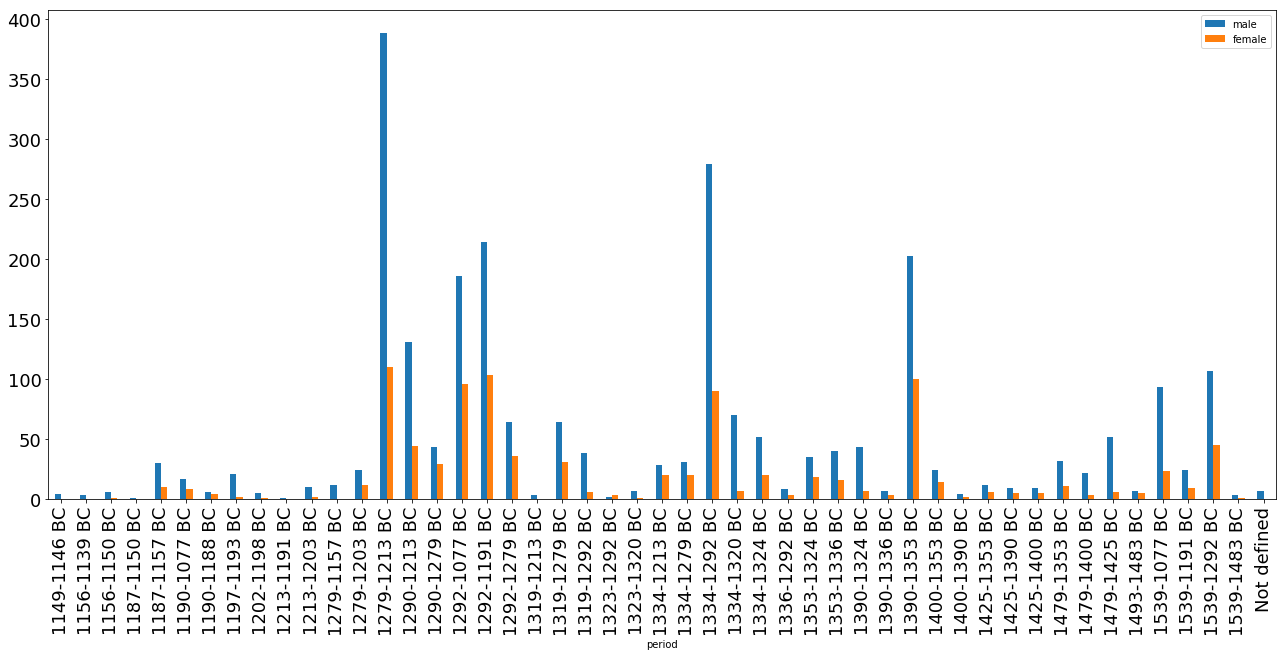

In [12]:
df=pd.DataFrame(finallist)
df = df.rename( columns={0: "period", 1: "male",2: "female", 3: "translit"}) 
df.set_index("period",drop=True,inplace=True)
df.plot(kind='bar', figsize=(22, 9), fontsize=18)

In [13]:
finallist=list()
overalltitlecount=list()
for j in range(len(peri)):
    temp=list()
    title1=list()
    for k in range(len(reduceddb)):
        try:
            if reduceddb[k]['period'] == peri[j]:
                temp.append(reduceddb[k]['related_persons_list'])
        except:
            pass
    gend=nested_lookup("gender",temp)
    trans=nested_lookup("translit",temp)
    ids=nested_lookup("id",temp)
    for element in ids:
        try:
            title1.append(database[element]['related_titles_list'][0]['translation'])
        except:
            pass
    titlecount=Counter(title1)
    overalltitlecount.append(title1)
    df1 = pd.DataFrame(list(titlecount.items()))
    df1 = df1.rename( columns={0: "title", 1: "#"}) 
    finallist.append((peri[j], titlecount ))

In [14]:
flat_list = [item for sublist in overalltitlecount for item in sublist]

In [15]:
df = pd.DataFrame(finallist)
df = df.rename( columns={0: "period", 1: "title"}) 
df

,period,title
0,1149-1146 BC,{'overseer of the storehouse': 2}
1,1156-1139 BC,{'vizier': 3}
2,1156-1150 BC,"{'royal butler': 4, 'royal butler of the lord of two lands': 1, 'chantress of Amun': 1}"
3,1187-1150 BC,"{'royal butler, pure of hands': 1}"
4,1187-1157 BC,"{'scribe': 1, 'general': 1, 'quarryman': 1, 'chantress of Thot': 1, 'great deputy of craftsmen of the Per-Khener of the pharao': 3, 'royal scribe': 5, 'chief servant of the royal butler Hori': 1, 'royal butler': 6, 'wab priest of the te..."
5,1190-1077 BC,"{'great scribe of the inventory of Amun': 1, 'chantress of Amun': 2, '[…] of Memphis': 1, 'royal scribe': 3, 'chantress of Isis': 1, 'chief scribe's assistant of the army': 1, 'charioteer': 1, 'standard bearer': 1, 'scribe of the offeri..."
6,1190-1188 BC,"{'royal scribe': 4, 'overseer of young cattle of Ptah': 1, 'craftsman at the place of truth': 1, 'goldsmith': 1}"
7,1197-1193 BC,"{'privy to the secret(s) of the house of Ptah': 1, 'god's father of Ptah': 1, 'god's father and god's beloved': 14, 'herdsman of the vizier Hori of Memphis': 1, 'stable master': 2, 'scribe': 1}"
8,1202-1198 BC,"{'wab priest of Ptah': 4, 'deputy of the house of Ptah': 1, 'chantress of the mistress of the southern sycomore': 1}"
9,1213-1191 BC,{'master of the offering table of Ptah': 1}


In [16]:
########################
### WEITERE FUNKTION ###
########################
def Plot(var1):
   # l=Counter(var1)
    l=list(var1.items())
    d = {"object":[item[0] for item in l] , 'number': [item[1] for item in l]};
    pd.set_option('max_colwidth',240)
    df = pd.DataFrame(data=d)
    df.set_index("object",drop=True,inplace=True)
    return df.plot(kind='bar', figsize=(12, 5), fontsize=12)      

### Dropdown menu

- wähle ein Datum aus um die "Jobs" anzuzeigen

In [17]:
def f(x):
    ind=list(df["period"]).index(x)
    return Plot(df["title"][ind])
interact(f, x=df["period"]);

interactive(children=(Dropdown(description='x', options=('1149-1146 BC', '1156-1139 BC', '1156-1150 BC', '1187…

### Welche IDs kommen am häufigsten vor
- id = 0 zählt nicht 

In [18]:
allkeys=list(database.keys())
testlist=list()
for p in allkeys:
    liste1=nested_lookup("id",database[p])
    testlist.append(liste1)
flat_list = [item for sublist in testlist for item in sublist]
x=Counter(flat_list)
x.most_common()[1:10]

[(10368, 56),
 (10315, 44),
 (10434, 44),
 ('10662', 38),
 ('10609', 37),
 ('10688', 37),
 (10646, 37),
 (10155, 36),
 (10327, 35)]

In [19]:
persons[1].keys()

dict_keys(['_id', '_rev', 'id', 'type', 'obj_id', 'hierarchy_entries', 'resource_entries', 'title', 'creator', 'pub_year', 'update_date', 'holder', 'version', 'scis', 'dating', 'kingdom', 'period', 'related_persons_from_person_list', 'related_titles_list', 'id_persons', 'name', 'notes', 'other_name', 'gender', 'name_translit', 'link_bonner_totenbuch', 'link_trismegistos', 'link_tla', 'person_no_ranke', 'persons_objects_list', 'subtitle', 'metadata', 'resources'])

In [20]:
title[1].keys()

dict_keys(['_id', '_rev', 'id', 'type', 'obj_id', 'hierarchy_entries', 'resource_entries', 'title', 'creator', 'pub_year', 'update_date', 'holder', 'version', 'scis', 'titles_related_persons_list', 'titles_index', 'titles_translit', 'titles_translat', 'titles_translat_eng', 'region', 'gott_kult', 'ad_sec', 'field2', 'field3', 'field4', 'field5', 'field6', 'titel_hierach', 'titel_kern', 'titel_spez_taetigkeit', 'titel_spez_gott_koenig_pers', 'titel_spez_epitheton', 'titel_spez_institution', 'titel_spez_toponym', 'subtitle', 'metadata', 'resources'])

In [21]:
title[1];

In [22]:
gott_kult = nested_lookup("gott_kult", title)
region= nested_lookup("region", title)
field2= nested_lookup("field2", title)
field3= nested_lookup("field3", title)
field4= nested_lookup("field4", title)

<class 'collections.Counter'>


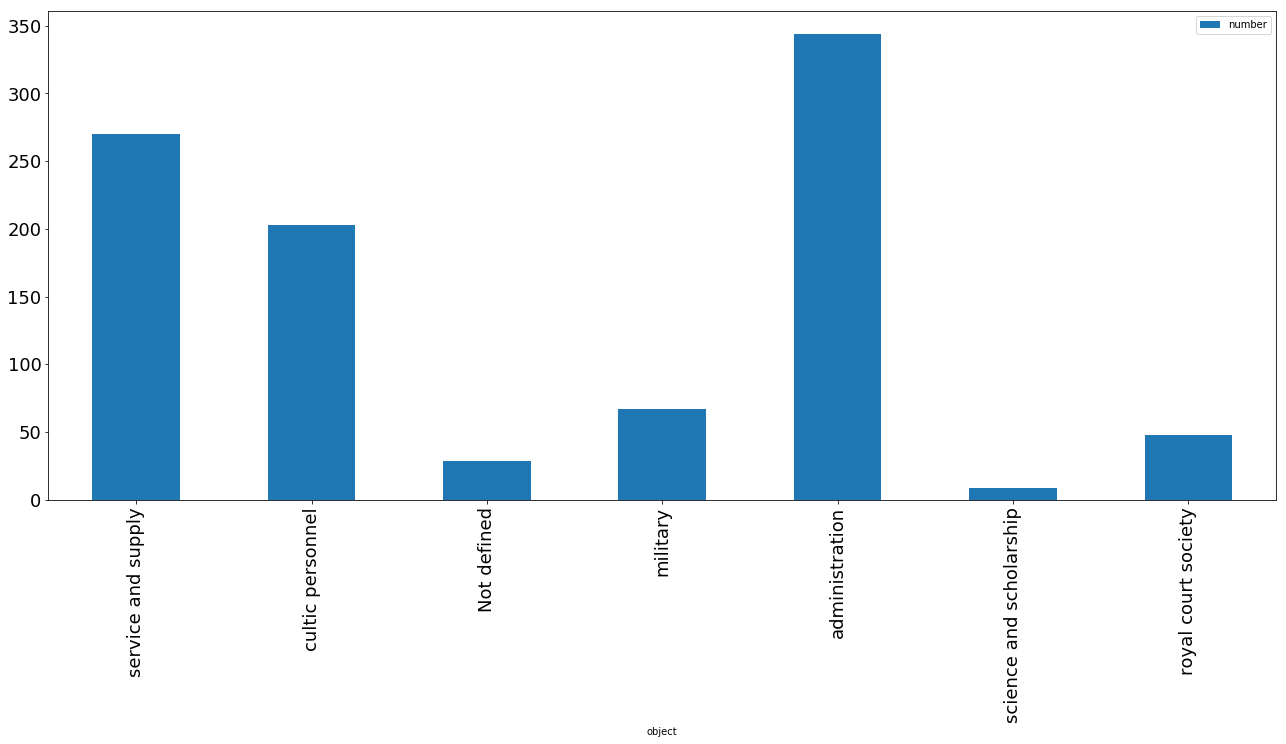

In [23]:
PlotDistribution(field2)

In [24]:
d = {'job groups': field2, 'jobs': field3, 'gender': field4}
dfpivot = pd.DataFrame(data=d)
dfpivot.head()

,job groups,jobs,gender
0,service and supply,agriculture and farming,male
1,cultic personnel,assistants,male
2,cultic personnel,assistants,male
3,cultic personnel,assistants,male
4,service and supply,guards and assistants,female


In [25]:
pivot_ui(dfpivot, outfile_path='pivottablejs.html', url='', width='100%', height='900')

In [26]:
ids=database["20005"]['titles_related_persons_list'][0]['id']

In [27]:
#database['10001'].keys()

In [28]:
database[str(ids)]['period']

'1334-1292 BC'

In [226]:
jobgroup=list()
for j in range(len(title)):
    try:
        ids=title[j]['titles_related_persons_list'][0]['id']
        jobgroup.append((title[j]['field2'], database[str(ids)]['dating']))
    except:
        pass

In [227]:
pd.DataFrame(jobgroup)

,0,1
0,service and supply,"NK, Dyn 18"
1,cultic personnel,"NK, Dyn 18"
2,cultic personnel,"NK, Dyn 18"
3,cultic personnel,"NK, Dyn 18"
4,service and supply,NK
5,cultic personnel,"NK, Dyn 18"
6,cultic personnel,"NK, Dyn 18"
7,cultic personnel,"NK, Dyn 18"
8,cultic personnel,"NK, Dyn 19"
9,cultic personnel,"NK, Dyn 19"


In [228]:
jg=[i[0] for i in jobgroup]
ep=[i[1] for i in jobgroup]

In [229]:
d = {'job groups': jg, 'period': ep}
dfpivot2 = pd.DataFrame(data=d)
dfpivot2.head()

,job groups,period
0,service and supply,"NK, Dyn 18"
1,cultic personnel,"NK, Dyn 18"
2,cultic personnel,"NK, Dyn 18"
3,cultic personnel,"NK, Dyn 18"
4,service and supply,NK


In [230]:
pivot_ui(dfpivot2, outfile_path='pivottablejs.html', url='', width='100%', height='900')

In [195]:
df_widget=qgrid.show_grid(dfpivot0, show_toolbar=True)

In [196]:
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [180]:
volume=[(a*b*c)/1000000.0 for a,b,c in zip(object_height,object_lenght, object_width)]

In [197]:
v=list(zip(object_id, object_type, volume))

In [198]:
dfvol=pd.DataFrame(v)
dfvol = dfvol.rename( columns={0: "object id", 1: "type", 2: "volume [m^³]"}) 
dfvol

,object id,type,volume [m^³]
0,1,stela,0.000000
1,2,stela,0.000000
2,3,(tomb's) equipment,0.000000
3,4,architectural element,0.000000
4,5,small finds,0.004002
5,7,stela,0.000000
6,8,statue,0.059280
7,9,statue,0.069066
8,10,statue,0.042204
9,11,(tomb's) equipment,0.001050


In [184]:
#pivot_ui(dfvol)

In [199]:
df_vol=qgrid.show_grid(dfvol, show_toolbar=True)

In [200]:
df_vol

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [208]:
database["99"]['scis']['images'][0]['title']

'PROM0181'

In [221]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://img.rmo.nl/imageproxy/proxy.aspx?server=10.0.10.13&port=5297&filename=\\\\142908.jpg")